### Car Price Prediction Model

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv("CarPrice.csv")
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
data.shape

(205, 26)

In [6]:
data.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [7]:
df=data.copy()

In [8]:
df.isnull().sum().any()

False

In [10]:
df.CarName.unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


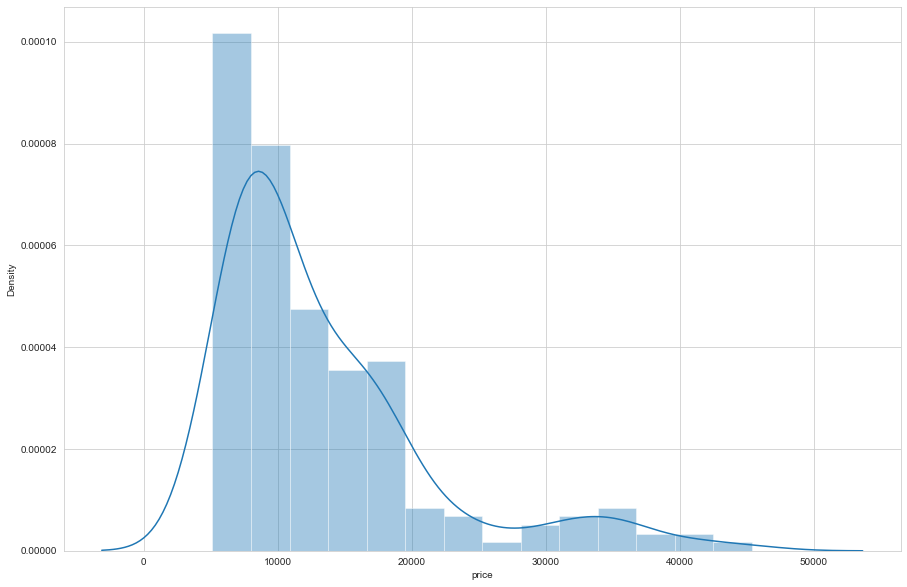

In [9]:
sns.set_style("whitegrid")
plt.figure(figsize=(15, 10))
sns.distplot(df.price)
plt.show()

In [11]:
del df['car_ID']

In [13]:
corr=df.corr()

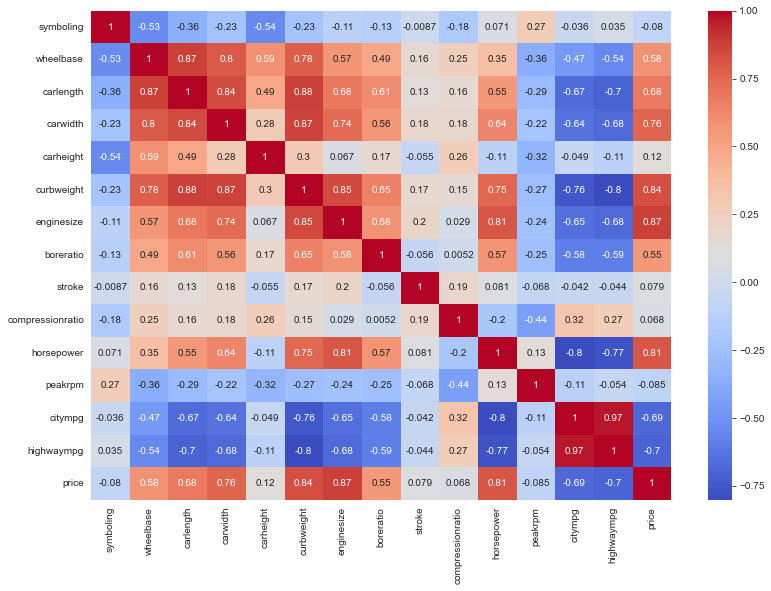

In [14]:
plt.figure(figsize=(13,9))
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.show()

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [16]:
df=df[['symboling','wheelbase','carlength','carwidth','carheight','curbweight',
       'enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']]

In [17]:
import warnings
warnings.filterwarnings('ignore')

x=np.array(df.drop(['price'],axis=1))
y=np.array(df['price'])

In [19]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25)

### Random Forest 

In [35]:
from sklearn.ensemble import RandomForestRegressor
model1=RandomForestRegressor(n_estimators=200)
model1.fit(xtrain,ytrain)

RandomForestRegressor(n_estimators=200)

In [36]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_error

In [37]:
# train score
model1.score(xtrain,ytrain)

0.9892304797336262

In [38]:
# test score
model1.score(xtrain,ytrain)

0.9892304797336262

In [39]:
ypred1=model1.predict(xtest)

In [40]:
mean_squared_error(ytest,ypred1)

4934298.308629417

In [41]:
mean_absolute_error(ytest,ypred1)

1635.566470416667

### SVM

In [42]:
from sklearn.svm import SVR
model2=SVR()

In [43]:
model2.fit(xtrain,ytrain)

SVR()

In [44]:
# train score
model2.score(xtrain,ytrain)

-0.1542974498666938

In [45]:
# test score
model2.score(xtest,ytest)

-0.22376494363478838

In [46]:
ypred2=model2.predict(xtest)

In [47]:
mean_squared_error(ytest,ypred2)

71018392.97700152

In [48]:
mean_absolute_error(ytest,ypred2)

5656.86436280044

In [49]:
# parameter tunning

# defining parameter range
params = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

In [51]:
from sklearn.model_selection import GridSearchCV

In [52]:
grid = GridSearchCV(estimator=SVR(),param_grid=params, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(xtrain, ytrain)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.103 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.131 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.076 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.201 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.379 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.103 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.131 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.076 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.201 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.379 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-0.103 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=0.01, kernel=rbf;

[CV 1/5] END ...C=1000, gamma=0.01, kernel=rbf;, score=-0.085 total time=   0.0s
[CV 2/5] END ...C=1000, gamma=0.01, kernel=rbf;, score=-0.102 total time=   0.0s
[CV 3/5] END ...C=1000, gamma=0.01, kernel=rbf;, score=-0.001 total time=   0.0s
[CV 4/5] END ...C=1000, gamma=0.01, kernel=rbf;, score=-0.178 total time=   0.0s
[CV 5/5] END ...C=1000, gamma=0.01, kernel=rbf;, score=-0.315 total time=   0.0s
[CV 1/5] END ..C=1000, gamma=0.001, kernel=rbf;, score=-0.043 total time=   0.0s
[CV 2/5] END ..C=1000, gamma=0.001, kernel=rbf;, score=-0.072 total time=   0.0s
[CV 3/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.137 total time=   0.0s
[CV 4/5] END ..C=1000, gamma=0.001, kernel=rbf;, score=-0.129 total time=   0.0s
[CV 5/5] END ..C=1000, gamma=0.001, kernel=rbf;, score=-0.220 total time=   0.0s
[CV 1/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.050 total time=   0.0s
[CV 2/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.039 total time=   0.0s
[CV 3/5] END ..C=1000, gamma

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [53]:
# print best parameter after tuning
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
SVR(C=1000, gamma=0.0001)


In [54]:
grid.score(xtrain,ytrain)

0.19246841257108793

In [55]:
grid.score(xtest,ytest)

0.08046175907019426

#### Decision Tree

In [57]:
from sklearn.tree import DecisionTreeRegressor

In [58]:
model3=DecisionTreeRegressor()

In [59]:
model3.fit(xtrain,ytrain)

DecisionTreeRegressor()

In [60]:
model3.score(xtrain,ytrain)

0.9990092028973158

In [61]:
model3.score(xtest,ytest)

0.808025585971738

In [62]:
ypred3=model3.predict(xtest)

In [105]:
mean_squared_error(y_test,y_pred3)

7656962.469844019

In [106]:
mean_absolute_error(y_test,y_pred3)

1756.5032115384615

In [117]:
# parameter tunning

In [118]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params=({})

### AdaboostRegressor

In [107]:
from sklearn.ensemble import AdaBoostRegressor

In [108]:
model4=AdaBoostRegressor()

In [109]:
model4.fit(X_train,y_train)

AdaBoostRegressor()

In [110]:
# train score
model4.score(X_train,y_train)

0.9594711175260512

In [111]:
# test score
model4.score(X_test,y_test)

0.9007125947100716

In [112]:
y_pred4=model4.predict(X_test)

In [113]:
mean_squared_error(y_test,y_pred4)

4806003.368437744

In [116]:
mean_absolute_error(y_test,y_pred4)

# MAE output is non-negative floating point. The best value is 0.0.

1659.6980030693753